In [1]:
# 1. Improving speed, performance, save space, better visualizations.
# Losing some information, computation cost, pipeline complexity, decreased interpretation

In [2]:
# 2. More dimensions require more data

In [3]:
# 3. For PCA, somewhat, for other algorithms, no

In [4]:
# 4. Yes, using kernels

In [5]:
# 5. It depends

In [6]:
# 6. PCA: use if the data fits the memory
# Incremental PCA: like mini batch GD, use if data doesnt fit or online training
# Randomized PCA: use for improved speed when keeping only a small number of principle components
# Kernel PCA: use for nonlinear projections

In [7]:
# 7. Evaluate based on the task at hand or reconstruction error

In [8]:
# 8. Yes, to utilize faster algorithms like PCA for pre-preprocess before using something slower

In [9]:
# 9. PCA and logistic and rf on MNIST, speed comparison

In [12]:
# Import MNIST dataset
import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)
X_train, X_test = mnist['data'][:60000], mnist['data'][60000:]
y_train, y_test = mnist['target'][:60000], mnist['target'][:60000]

In [13]:
# Original dataset rf speed
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

t0 = time.time() # starts timing
rf_clf.fit(X_train, y_train)
t1 = time.time()

print('Training time {:.2f}s'.format(t1-t0))

Training time 36.18s


In [15]:
# Original dataset logistic speed
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs',
                            random_state=42)

t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

print('Training time {:.2f}s'.format(t1-t0))

Training time 10.17s


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [16]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [17]:
# Reduced dataset rf speed
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

t0 = time.time()
rf_clf.fit(X_train_reduced, y_train)
t1 = time.time()

print('Training time {:.2f}s'.format(t1-t0))

Training time 80.95s


In [18]:
# Original dataset logistic speed
log_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs',
                            random_state=42)

t0 = time.time()
log_clf.fit(X_train_reduced, y_train)
t1 = time.time()

print('Training time {:.2f}s'.format(t1-t0))

Training time 4.49s


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [19]:
# 10. t-SNE, LLE, MDS on MNIST

In [31]:
# Subset 10000 samples from MNIST
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]
y = y.astype(int)

In [22]:
# Applyting t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

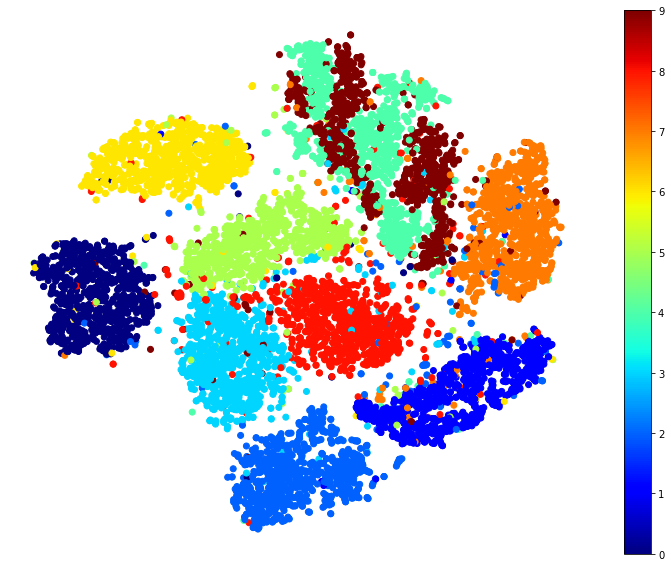

In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

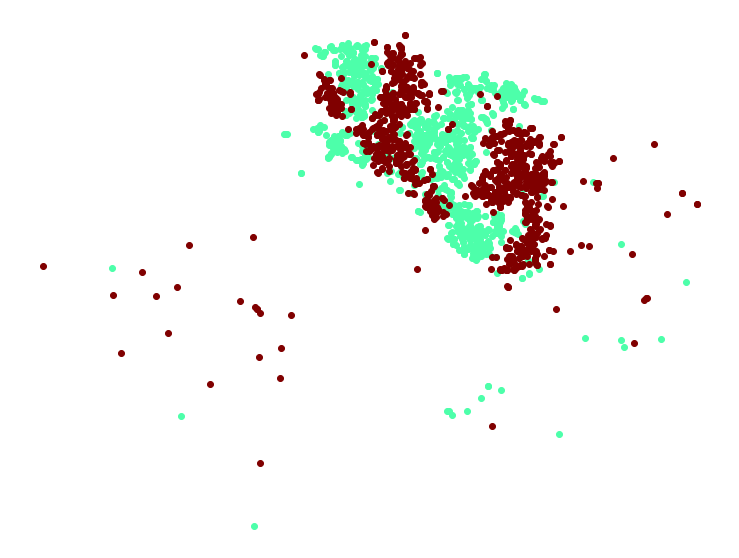

In [36]:
# Plotting specific labels
plt.figure(figsize=(13, 10))
cmap = mpl.cm.get_cmap('jet')
for digit in (4,9):
    plt.scatter(X_reduced[y==digit, 0], X_reduced[y==digit, 1], c=[cmap(digit/9)])
plt.axis('off')
plt.show()

In [37]:
# More seperration by more t-SNE
idx = (y==4) | (y==9)
X_overlap = X[idx]
y_overlap = y[idx]

tsne_overlap = TSNE(n_components=2, random_state=42)
X_overlap_reduced = tsne_overlap.fit_transform(X_overlap)

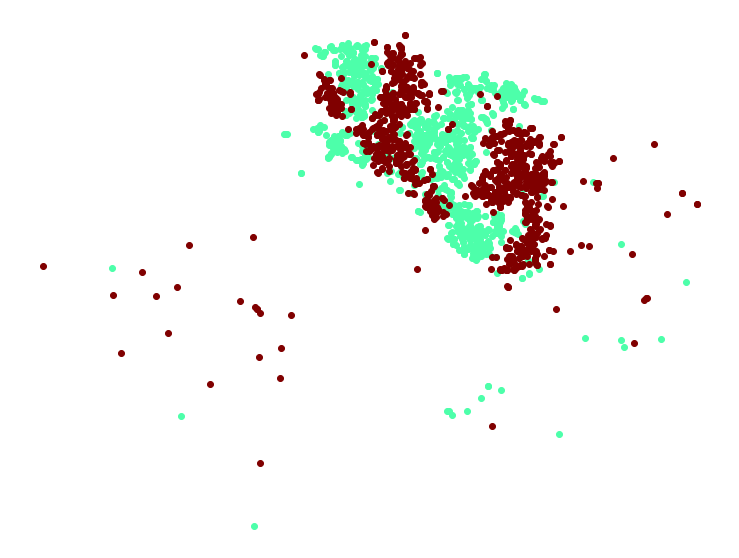

In [38]:
plt.figure(figsize=(13, 10))
cmap = mpl.cm.get_cmap('jet')
for digit in (4,9):
    plt.scatter(X_reduced[y==digit, 0], X_reduced[y==digit, 1], c=[cmap(digit/9)])
plt.axis('off')
plt.show()

In [39]:
# Running t-sne again only might maybe create better seperation

In [42]:
# Extra fancy plotting
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_dist=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)   # scale to 0 - 1
    neighbors = np.array([[10., 10.]])   # placeholder neighbors
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap('jet')
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y==digit, 0], X_normalized[y==digit, 1],
                   c=[cmap(digit/9)])
    plt.axis('off')
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_dist = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_dist > min_dist:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                        color=cmap(y[index]/9), fontdict={'weight':'bold', 'size':16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap='binary'), image_coord)
                ax.add_artist(imagebox)

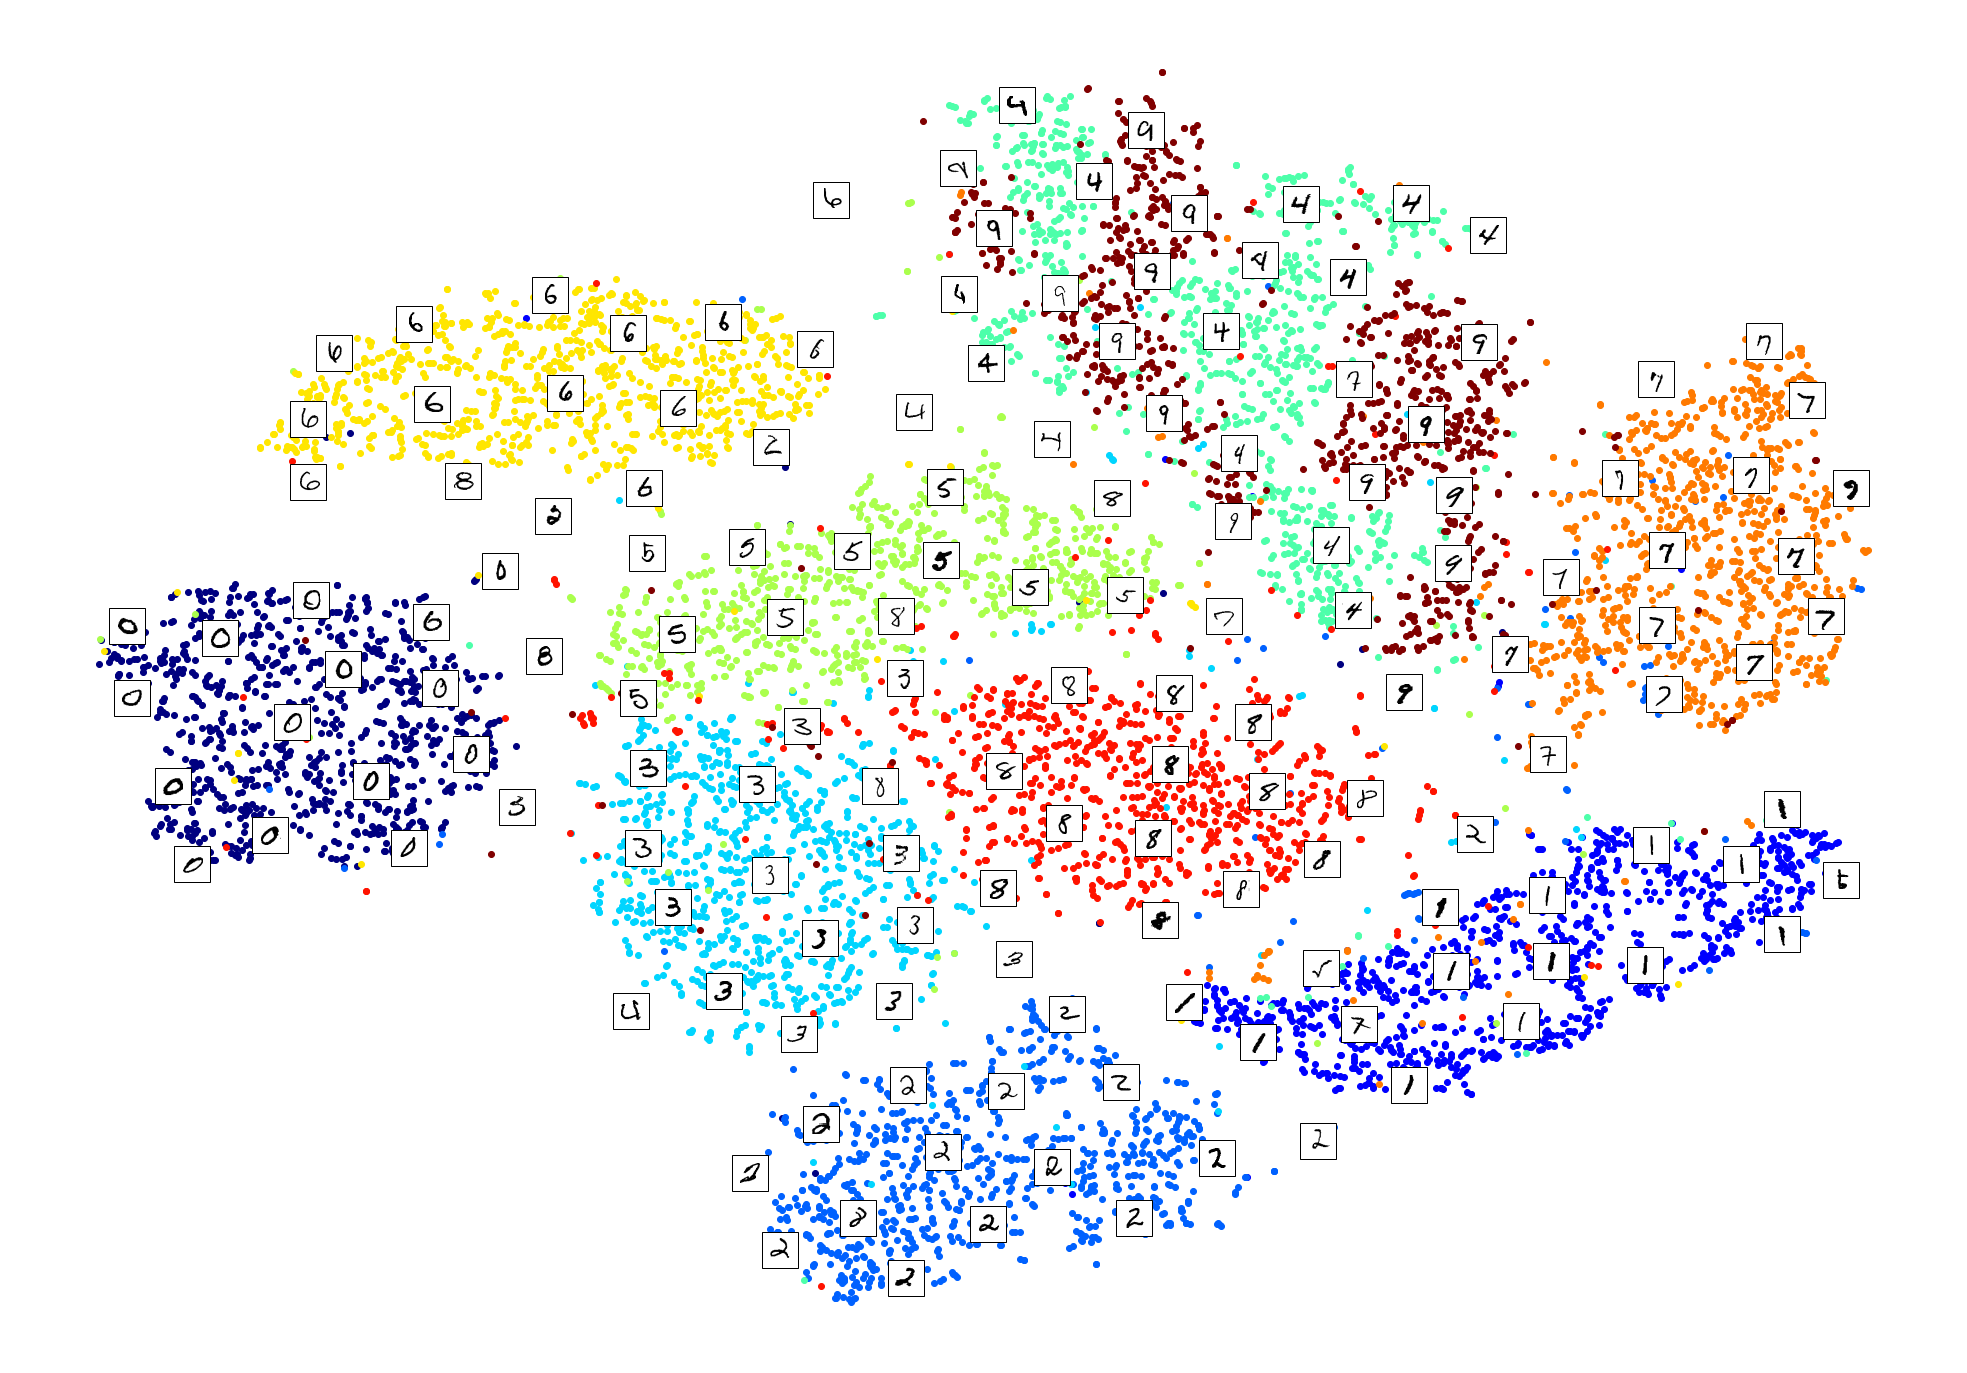

In [43]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

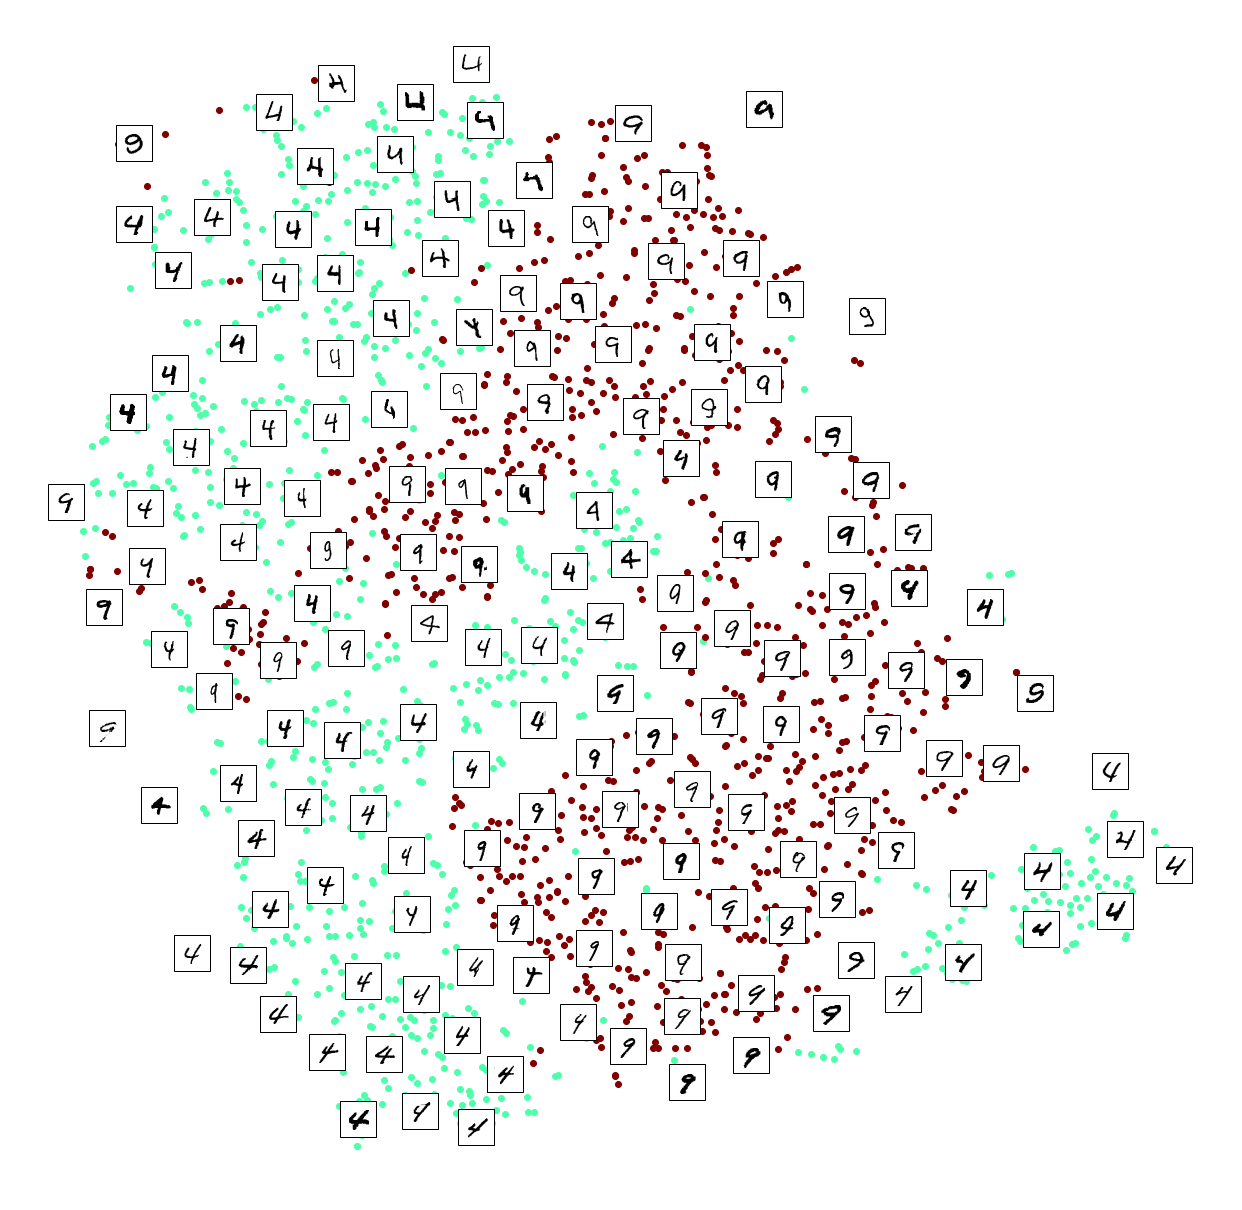

In [44]:
plot_digits(X_overlap_reduced, y_overlap, images=X_overlap, figsize=(22, 22))

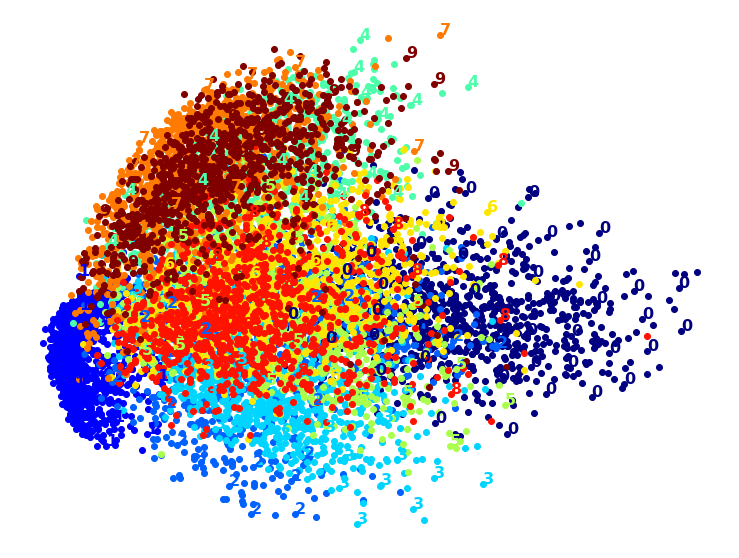

In [45]:
# Plotting reduced set with PCA
from sklearn.decomposition import PCA

X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
plot_digits(X_pca_reduced, y)
plt.show()

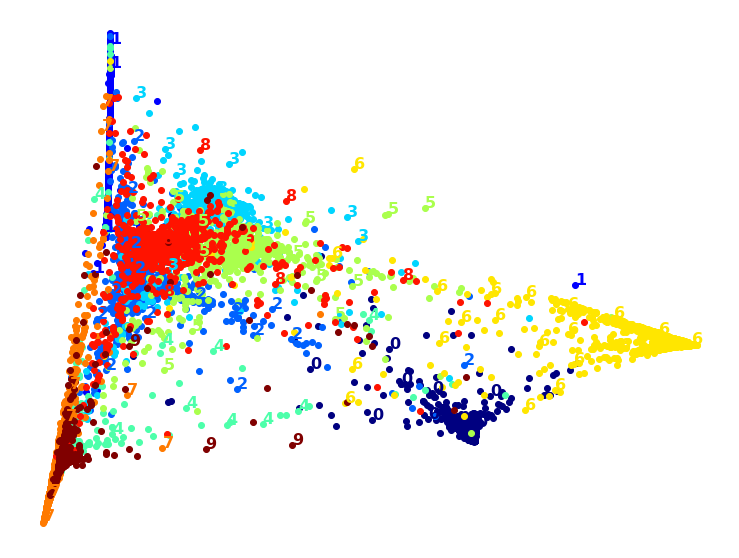

In [46]:
# Same thing but LLE
from sklearn.manifold import LocallyLinearEmbedding

X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
plot_digits(X_lle_reduced, y)

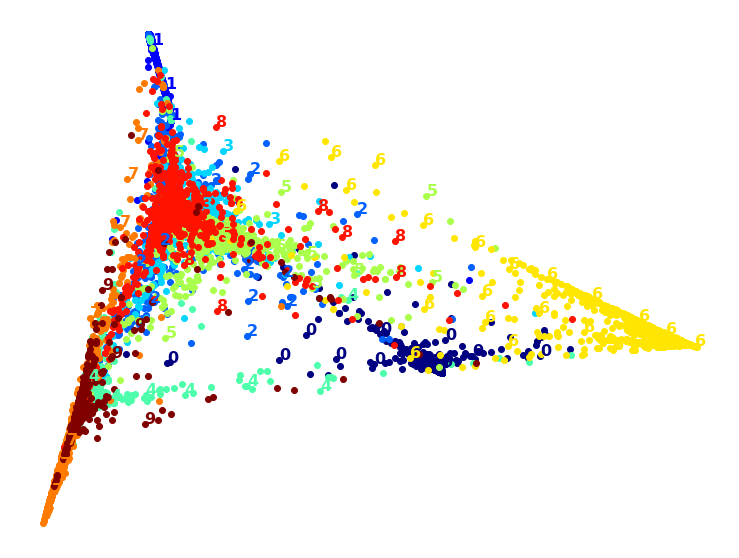

In [50]:
# Performing PCA first to shorten time doing LLE
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('lle', LocallyLinearEmbedding(n_components=2, random_state=42)),
])
X_pl_reduced = pca_lle.fit_transform(X)
plot_digits(X_pl_reduced, y)
plt.show()

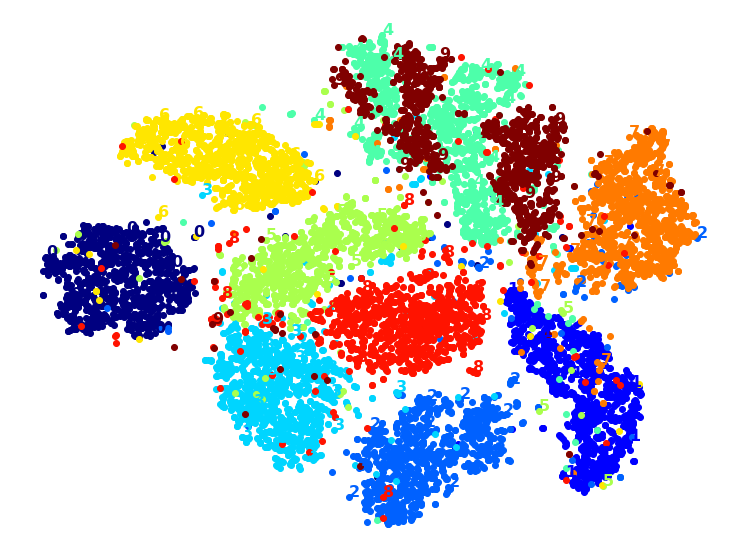

In [52]:
# PCA and t-SNE pipeline
pca_tsne = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('tsne', TSNE(n_components=2, random_state=42)),
])
X_pt_reduced = pca_tsne.fit_transform(X)
plot_digits(X_pt_reduced, y)
plt.show()